In [1]:
import os
#Legacy TensorFlow BackEnd
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pathlib

In [5]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [3]:
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = pathlib.Path(path_to_zip).parent/'spa-eng/spa.txt'

2638744/2638744 [==============================] - 1s 1us/step


In [8]:
def load_data(path):
  text = path.read_text(encoding='utf-8')

  lines = text.splitlines()
  pairs = [line.split('\t') for line in lines]

  context = np.array([context for target, context in pairs])
  target = np.array([target for target, context in pairs])

  return target, context

In [9]:
context_raw,target_raw = load_data(path_to_file)
print(context_raw[-1])

If you want to sound like a native speaker, you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo.


In [10]:
print(target_raw[-1])

Si quieres sonar como un hablante nativo, debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un músico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado.


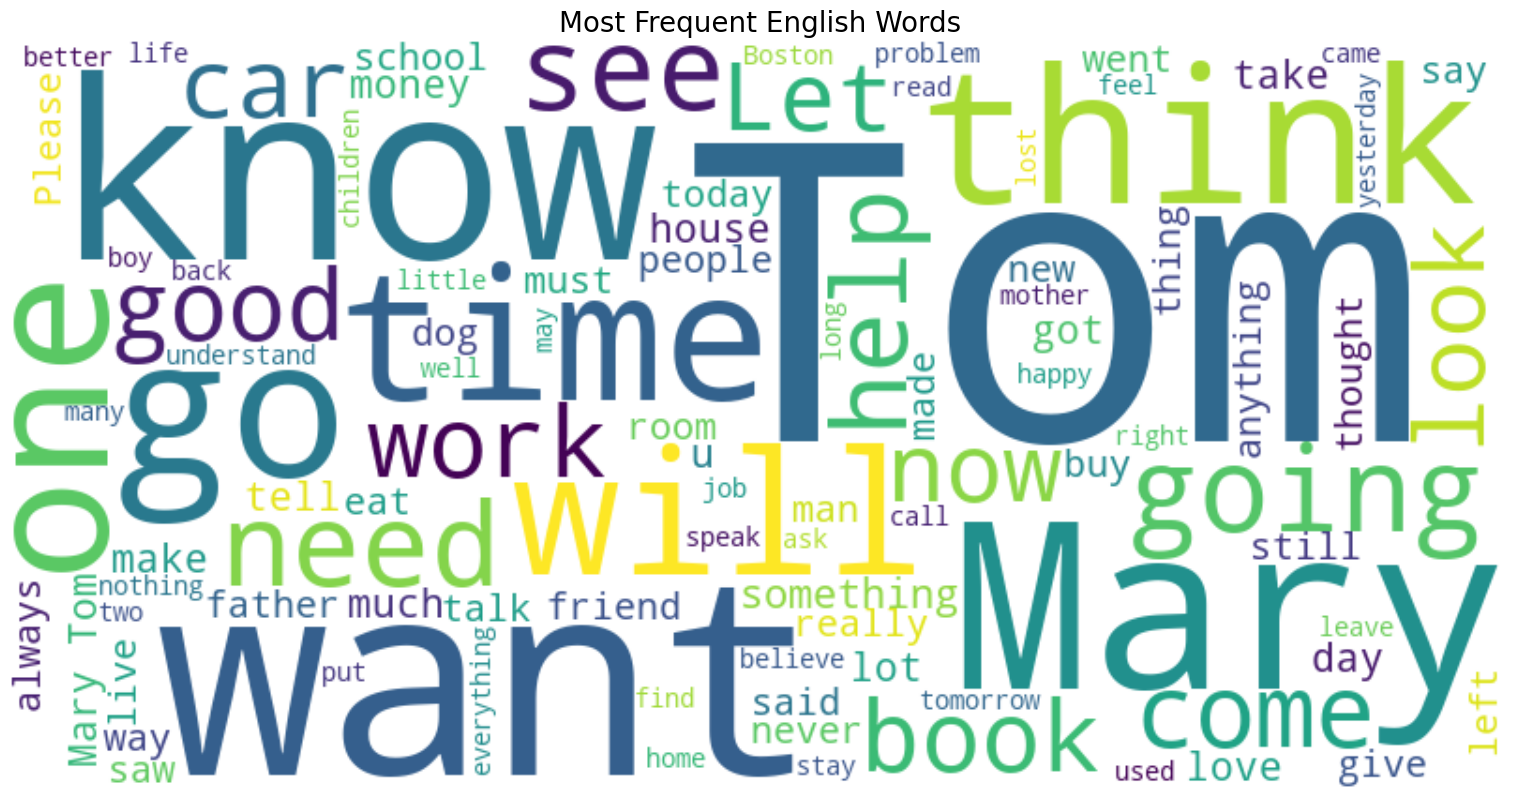

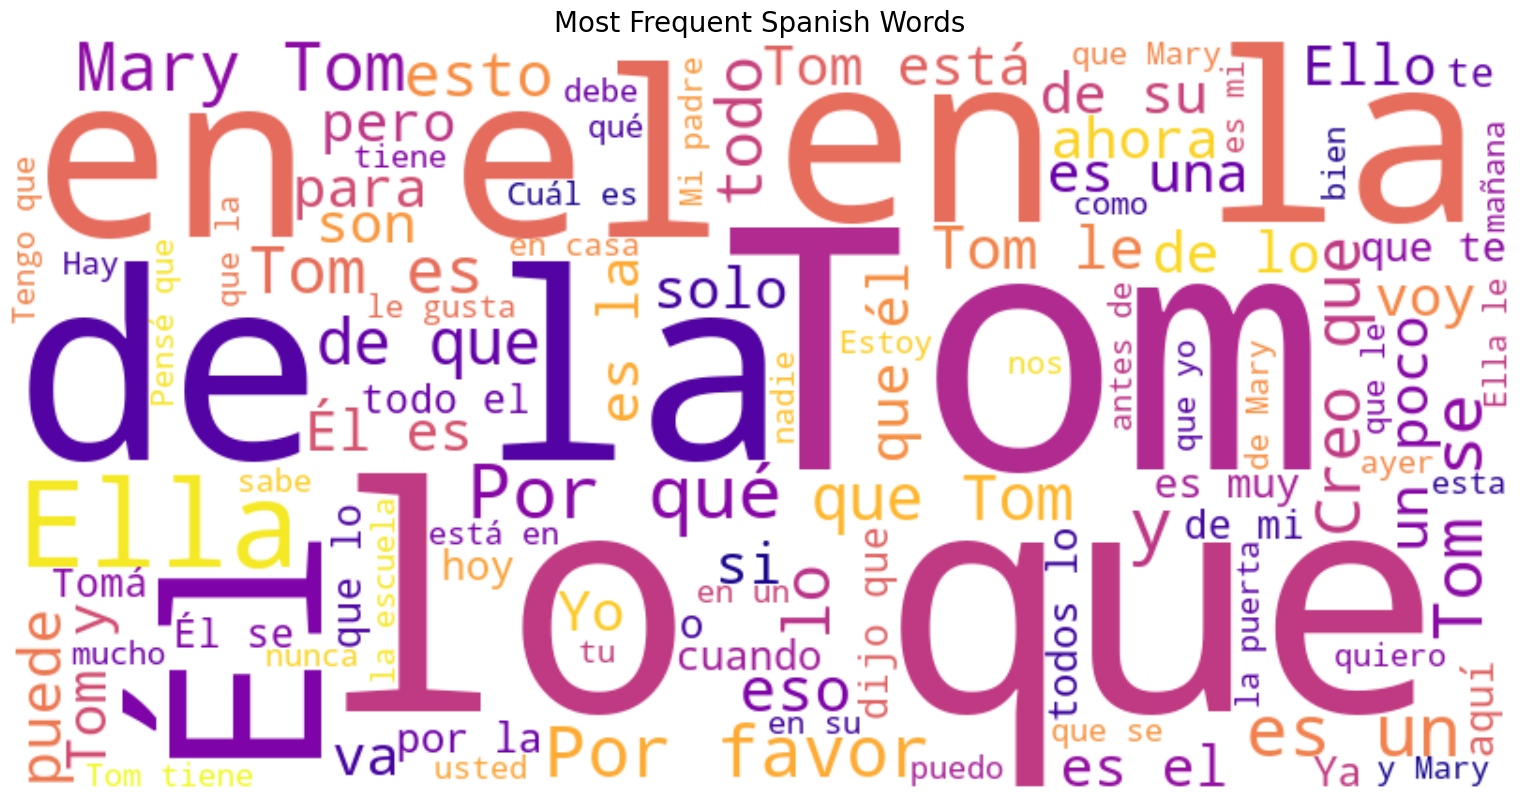

In [11]:
all_text_en = " ".join(context_raw)  # Join all sentences into one string

# Create word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis',  # You can change colors: 'plasma', 'inferno', 'magma', 'cool', etc.
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(all_text_en)

# Display it
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent English Words', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

# For Spanish text (same process):
all_text_es = " ".join(target_raw)
wordcloud_es = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=100
).generate(all_text_es)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_es, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Spanish Words', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

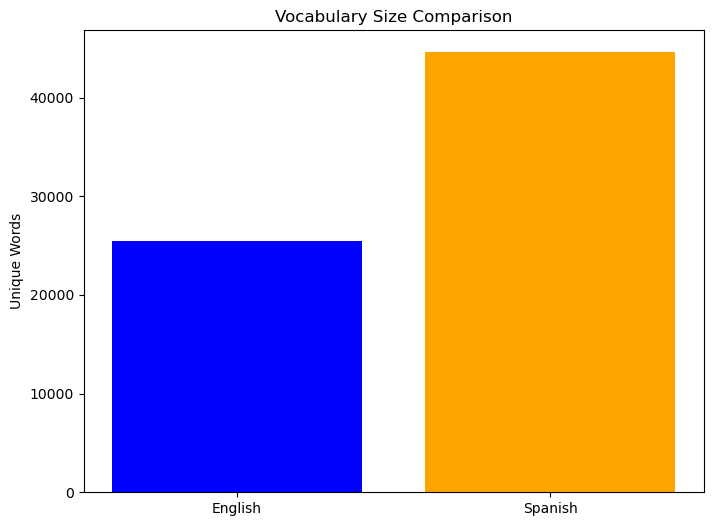

In [12]:
vocab_en = set(" ".join(context_raw).split())
vocab_es = set(" ".join(target_raw).split())

categories = ['English', 'Spanish']
vocab_counts = [len(vocab_en), len(vocab_es)]

plt.figure(figsize=(8, 6))
plt.bar(categories, vocab_counts, color=['blue', 'orange'])
plt.ylabel('Unique Words')
plt.title('Vocabulary Size Comparison')
plt.show()

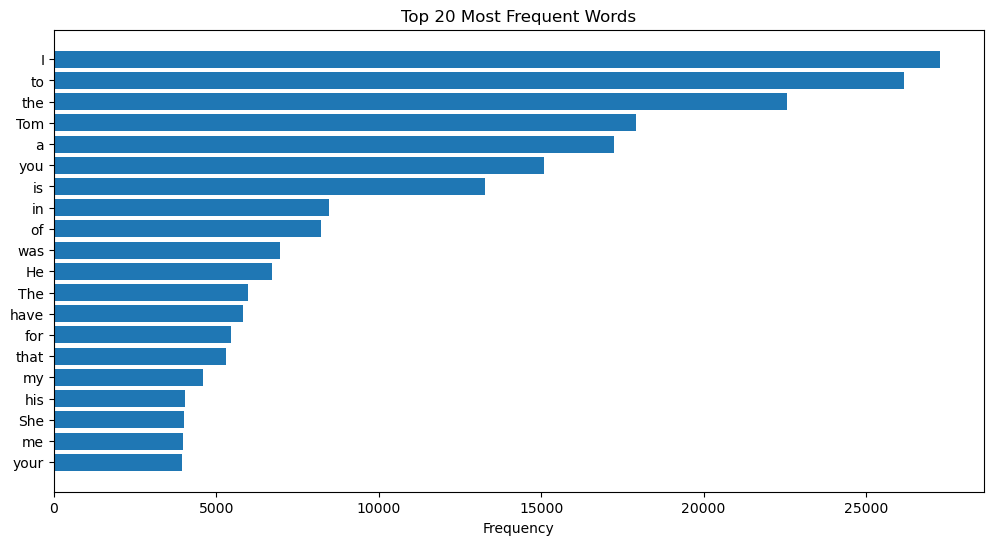

In [13]:
words = " ".join(context_raw).split()
word_counts = Counter(words).most_common(20)

words_list = [w[0] for w in word_counts]
counts = [w[1] for w in word_counts]

plt.figure(figsize=(12, 6))
plt.barh(words_list, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

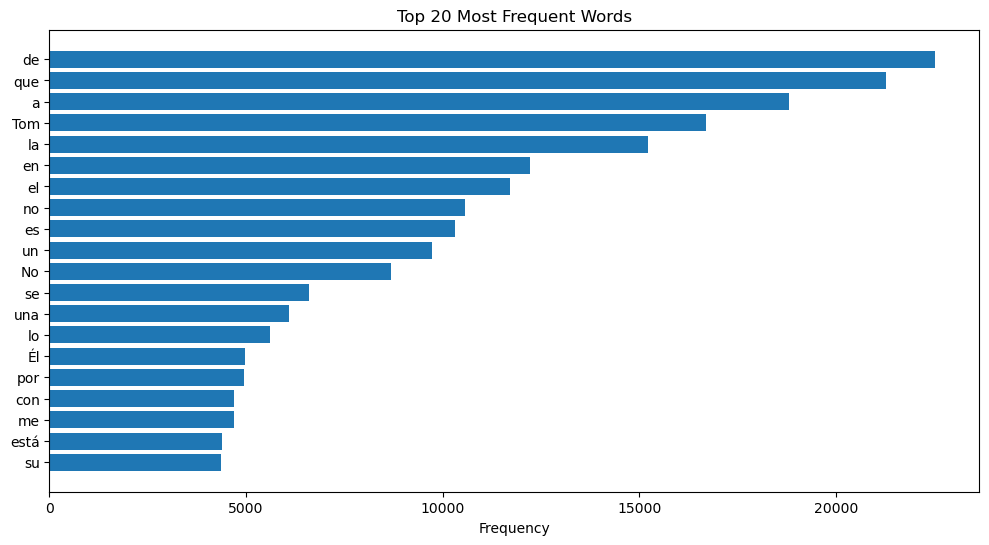

In [15]:
words = " ".join(target_raw).split()
word_counts = Counter(words).most_common(20)

words_list = [w[0] for w in word_counts]
counts = [w[1] for w in word_counts]

plt.figure(figsize=(12, 6))
plt.barh(words_list, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()